----------------------
# Machine Learning and Statistics - Project 2020
### Eoin Lees - G00387888 - January 2021
--------------

# Instructions

In this project you must create a web service that uses machine learning to make predictions
based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:

1. Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.

To enhance your submission, you might consider developing and comparing more than
one model. Rest assured, all the above concepts will be explored in lecture videos and
other materials in the coming semester.


---------------------------
# Introduction

---------------------------















## Simple linear regression


**What is regression analysis?**
"Regression analysis is a set of statistical processes for estimating the relationships between a dependent variable and one or more independent variables."[[1]](https://en.wikipedia.org/wiki/Regression_analysis)

"Linear regression is the most widely used statistical technique; it is a way to model a relationship between two sets of variables. The result is a linear regression equation that can be used to make predictions about data." [[2]](Linear regression is the most widely used statistical technique; it is a way to model a relationship between two sets of variables. The result is a linear regression equation that can be used to make predictions about data.)

## Complex regression

Regression can come in a number of different forms; linear, multiple linear and non linear. For linear relationships, as you increase the independent variable by one unit, the mean of the dependent variable always changes by a specific amount.[[3]](https://statisticsbyjim.com/regression/curve-fitting-linear-nonlinear-regression) 
This is not always the case, especially in real world scenarios. Often there are curved relationships between the variables. In a curved relationship the effect of the independent variable is not a constant value. 

You can fit curves using linear regression. It is common to use polynominal terms in a linear model. Polynomial terms are independent variables that you raise to a power, such as squared or cubed terms.[[3]](https://statisticsbyjim.com/regression/curve-fitting-linear-nonlinear-regression) 
By counting the number of bends in a line it is possible to quickly determine the correct terms to use. Take the number of bends in your curve and add one for the model order that you need.

Below are examples of polynomial curves:[[3]](https://statisticsbyjim.com/regression/curve-fitting-linear-nonlinear-regression)

Linear | Quadratic | Cubic
:-: | :-: | :-:
 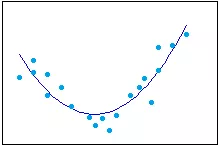 | 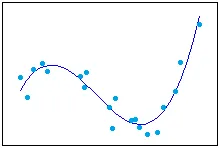 | 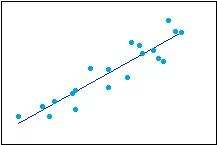 



## Dataset


This analysis is performed on a dataset that shows how much power is produced by a wind turbine depending on a specific wind speed. It is available for download from the github of user ianmcloughlin for the purpose of this exercise. [[4]](https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv)

The dataset consists of two columns of values, `speed` and `power` with 500 entries in each. Each wind speed value corrosponds to the power produced value directly. 





## Import modules and plot styles
---------------------

In [1]:
#Import Modules
import pandas as pd
import matplotlib.style as style
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

import tensorflow.keras as kr


In [2]:
# Check Stlyes available for plots and set style
style.available
style.use('fivethirtyeight')

## Import Data
------------------------

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


## Initial  analysis and plots
-----------------------

In [4]:
# Desribe Variables
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


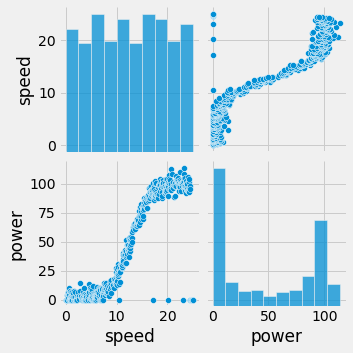

In [5]:
# Pairplot to get initial view of data.
sns.pairplot(df, palette="tab20c_r")

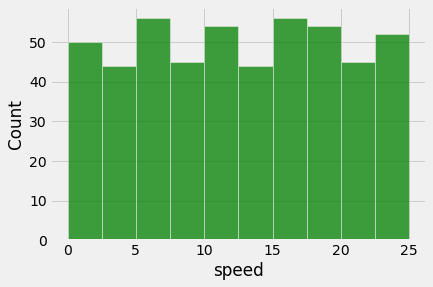

In [6]:
# Speed plotted againt count
sns.histplot(data=df, x="speed", color='g')
plt.show()

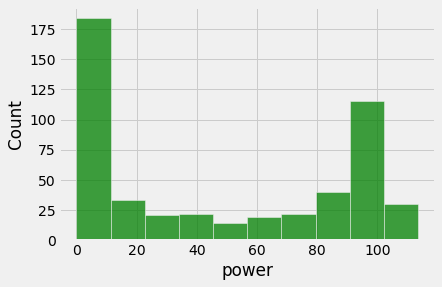

In [7]:
# Power plotted againt count
sns.histplot(data=df, x="power", color='g')
plt.show()

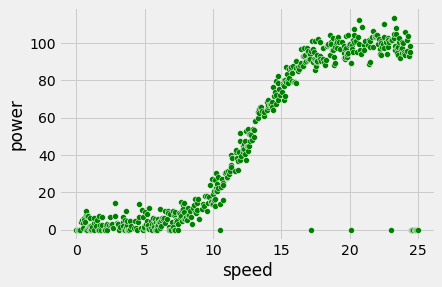

In [8]:
# Seaborn scatterplot of wind speed vs power

sns.scatterplot(data=df, x="speed", y="power", color='g')
plt.show()

#### Describe

Running the `df.describe()`[[5]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function gives a summary of all the data in the dataframe.

It gives us the limits of the data along with the mean values and standard deviations. These values can be usefull in simulating data. This function also gives us a good understanding of teh data in the function. 

#### Pairplot

Running `sns.pairplot()`[[6]](https://seaborn.pydata.org/generated/seaborn.pairplot.html) on a dataset is a good starting off point in understanding the relationship of variables. It provides us with all the the various plots we need to decide what to look at next. 

#### Speed plot

The speed plot was created using `sns.histplot()`[[7]](https://seaborn.pydata.org/generated/seaborn.histplot.html) and shows us that the speed roughly uniformly distributued. [[8]](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

#### Power plot

The power plot again was created using `sns.histplot()`.[[7]](https://seaborn.pydata.org/generated/seaborn.histplot.html)

It reveals some interesting information. Over 175 of the points  out of 500 are plotted are in the 0-10 power bracket suggesting that there is a threshold speed that must be reached in order for any power to be generated. 

#### Speed vs Power

The speed vs Power plot was created using `sns.scatterplot()`.[[9]](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) It shows the relationship between the two variables. 

This relationsship is not linear. It has two distinct curves. 

There are also a number of 0 power points at wind speeds above 10. This is not consistent with the rest of the data. 


## Clean the data set
-------------------------------

In [9]:
# outlier datapoints
df_out = df[(df["speed"]>10) & (df["power"]==0)]

print(df_out)
df_out.count()

      speed  power
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


speed    14
power    14
dtype: int64

In [10]:
# remove the outliers
dfClean = df.drop(df_out.index, axis=0)

# Output as csv 
dfClean.to_csv("powerproduction.csv", index=False, encoding='utf8')

In [11]:
# Describe new data
dfClean.describe()

,speed,power
count,486.000000,486.000000
mean,12.298311,49.397720
std,7.084043,41.391996
min,0.000000,0.000000
25%,6.137250,5.868250
50%,12.349500,44.773000
75%,18.386750,93.751250
max,24.399000,113.556000


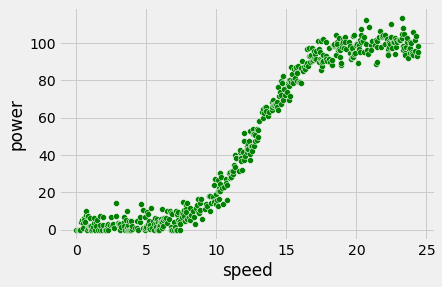

In [12]:
# New data Seaborn scatterplot of wind speed vs power

sns.scatterplot(data=dfClean, x="speed", y="power", color='g')
plt.show()

#### Identify outliers

The data that was identified as an outlier was any point that had a power value of 0 and a speed value greater than 10.

The outliers were identified using `df_out = df[(df["speed"]>10) & (df["power"]==0)]`.  The summary showed 14 datapoints that met this criteria. 

#### Removing outliers and saving 

The outliers were removed using `df.drop()`.[[10]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

A new dataset was created and saved to csv.

#### Review new data

After removing the outliers the average speed & max speed of the dataset have been reduced. 

Plotting Speed vs. Power again we can verify that the data is now more usable. 

--------------------------
# Linear Regression
-------------------------

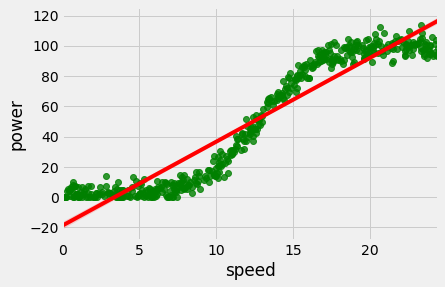

In [13]:
# Use seaborn regplot
sns.regplot(data=dfClean, x="speed", y="power",scatter_kws={"color": "green"}, line_kws={"color": "red",'linewidth':4});

### Method 1 -   Seaborn: Regplot

The seaborn module has a simple regression command called regplot. 

`sns.regplot()`: Plot data and a linear regression model fit.[[11]](https://seaborn.pydata.org/generated/seaborn.regplot.html)

**Results**

Taking the dataset and running it through this command we see the regression line plotted in red. As it is a simple linear regression line it does not accurately fit the data. 

-------------------------


In [14]:
# Perform linear regression
lr = LinearRegression()

# convert data into numpy array
X = dfClean.speed.values.reshape(-1, 1)
Y = dfClean.power.values.reshape(-1, 1)

lr.fit(X, Y)

# Y predictions off of X values
Y_pred = lr.predict(X)

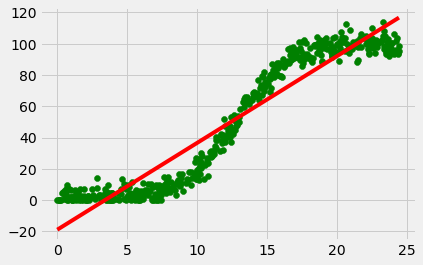

In [15]:
# Visualise the results
# create scatterplot from dataset
plt.scatter(X,Y, color="g")

# create regression line
plt.plot(X, Y_pred,  color='red')

# show plot
plt.show()

### Method 2 -   Scikit learn: Linear regression


`LinearRegression().fit()`: fits the data and performs linear regression on it. [[12]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) You can then create Y_pred to predict the y values according to the linear model. This method was found here. [[13]](https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d)

**Results**

We see the predicted regression line plotted in red. Once again it does not accurately fit the data. This is due to scikit learn applying ordinary least squares Linear Regression.


------------------
# Complex Linear regression
----------------

#### Polynominal regression

Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y. [[14]](https://en.wikipedia.org/wiki/Polynomial_regression)

A polynomial regression line has an equation of the form:

$$ y = \beta_{0} + \beta_{1}x + \beta_{2}x^2 + \beta_{3}x^3 \dotsb + \beta_{n}x^n + \varepsilon \hspace{1cm}  $$[[14]](https://en.wikipedia.org/wiki/Polynomial_regression)

Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function E(y|x) is linear in the unknown parameters that are estimated from the data. 

NumPy's polyfit function can be used to developed a polynomial model using the method of least squares.

The NumPy polyfit function solves for the 'best fit' coefficients of the polynomial regression model for the inputted data

y = 4.52411 * x + 0.04193 * x^2 + -14.68261


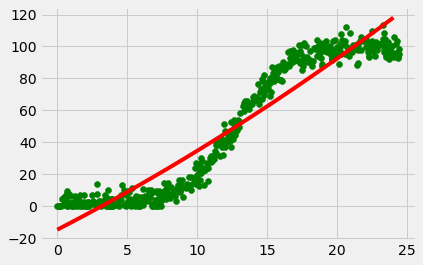

In [16]:
# fit a second degree polynomial 

# define the true objective function
def objective(x, a, b, c):
    return a * x + b * x**2 + c
 
# load the dataset
data = dfClean.values

# choose the input and output variables
x, y = data[:, 0], data[:, 1]

# curve fit
popt , _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

# plot input vs output
plt.scatter(x, y, color="g")

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b, c)

# create a line plot for the mapping function
plt.plot(x_line, y_line, color='red')
plt.show()


### Method 3: Polynominal Regression  - Second order


The objective function allows you to calculate the variables from the equation stated above. The 

Plotted using `plt.scatter()`: A scatter plot of y vs. x with varying marker size and/or color. [[16]](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html)

The `curve_fit()` function from scikit learn enables the use of non-linear least squares to fit a function, f, to the data  [[17]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) The method of fitting to a function is taken from the examples section of the scikit learn docs. 

**Results**

We see the predicted regression line plotted in red. It matches the above results, however the polynomial regression method allows us to increase the order. If we count the curves in the plot we can predict the oder of the equation. 


This is shown below: 

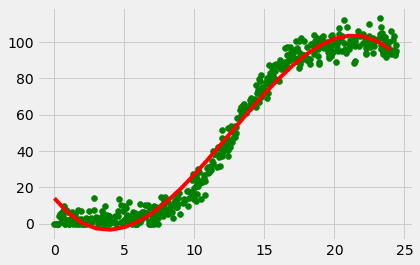

a: -9.674071378697455 b: 1.4937731793437792 c: -0.03952067527853641 d: 13.959602264553936


In [17]:
# fit a third degree polynomial 
 
# define the true objective function
def objective(x, a, b, c, d):
    return (a * x) + (b * x**2) + (c * x**3) + d
 
# load the dataset
data = dfClean.values

# choose the input and output variables
x, y = data[:, 0], data[:, 1]

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b, c, d = popt

# plot input vs output
plt.scatter(x, y, color='g')

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b, c, d)

# create a line plot for the mapping function
plt.plot(x_line, y_line, color='red')
plt.show()
print("a:",a, "b:",b, "c:",c, "d:",d)

### Method 3: Polynominal Regression  - Third order

The method is as above, with the addition of the next term in our equation so it ends up as :

$$ y = \beta_{0} + \beta_{1}x + \beta_{2}x^2 + \beta_{3}x^3 + \varepsilon \hspace{1cm}  $$


**Results**

We see the predicted regression line plotted in red. It matches the plot well. It is not a perfect fit however. 

A drawback of polynomial bases is that the basis functions are "non-local", meaning that the fitted value of y at a given value x = x0 [[15]](https://en.wikipedia.org/wiki/Polynomial_regression)

---------------------------------

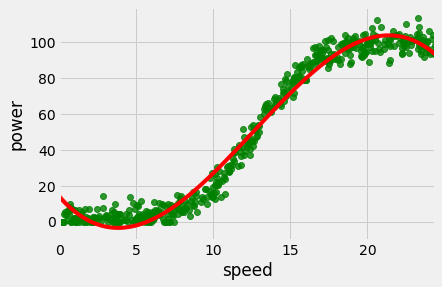

In [18]:
# Seaborn regplot
sns.regplot(data=dfClean, x="speed", y="power", scatter_kws={"color": "green"}, line_kws={"color": "red",'linewidth':4}, order=3);

#### Method 4 -   Seaborn: Regplot third order

The seaborn module has a simple regression command called regplot. 

`sns.regplot()`: Plot data and a linear regression model fit.[[11]](https://seaborn.pydata.org/generated/seaborn.regplot.html)

Unlike scikit learn the regression command in seaborn allows for the addition of the odrder option to specify the order of the polynomial equation. It uses the method explained above. 

**Results**

As the methods used are similar there are similar results created here.  The curve fits the plot closely. It is much less innacurate than simple linear regression. 

-------------------------


## Calculate costs

Calculating the cost of the polyfit line requires the correct formula.

Straight Line Fit: 
$$ \sum_i (y_i - mx_i - c)^2 $$


In [19]:
# Calculate cost 

# Calculate the best values for m and c.
x, y = data[:, 0], data[:, 1]
# First calculate the means (a.k.a. averages) of w and d.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from w and d.
x_zero = x - x_avg
y_zero = y - y_avg

# The best m is found by the following calculation.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * y_zero)
# Use m from above to calculate the best c.
c = y_avg - m * x_avg

# Cost of curve 1

cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2 for i in range(x.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

Cost with m =  1.00 and c = 37.10: 585076.27


In [20]:
np.corrcoef(x, y)[0][1]**2

0.9025487607456797

In [21]:
# Calculate the R-squared value for our data set.
rsq = 1.0 - (np.sum((y - m * x - c)**2) / np.sum((y - y_avg)**2))
rsq
#print("The R-squared value is %6.4f" % rsq)

0.2958940452661887

------------------
# Further study - Logistic Regression 
----------------

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.[[19]](https://en.wikipedia.org/wiki/Logistic_regression)

In this case it is wether the turbine is generating power or not. On/off. The slope indicates it is warming up, like a switch. 

We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.[[20]](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148)


## Sigmoid function

"A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve. A common example of a sigmoid function is the logistic function shown in the first figure and defined by the formula:"[[18]](https://en.wikipedia.org/wiki/Sigmoid_function)
<br>
<br>
<br>


<center>$$ S(x) = \frac{1}{1+{e}^{-x}} = \frac{{e}^{x}}{{e}^{x}+1}  $$ </center>

<br>
<br>
<br>

<img src="https://miro.medium.com/max/875/1*dm6ZaX5fuSmuVvM4Ds-vcg.jpeg" width="600">



---------------------------
# References
------------------------

[1] Regression analysis; Wikipedia; https://en.wikipedia.org/wiki/Regression_analysis

[2] Linear Regression: Simple Steps, Video. Find Equation, Coefficient, Slope; Statistics How To;  https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/

[3] Curve Fitting using Linear and Nonlinear Regression; Jim Frost; Statistics by jim; https://statisticsbyjim.com/regression/curve-fitting-linear-nonlinear-regression.

[4] ianmcloughlin; github.com; https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv

[5] pandas.DataFrame.describe; the pandas development team; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

[6] seaborn.pairplot; seaborn; Michael Waskom; https://seaborn.pydata.org/generated/seaborn.pairplot.htmlPairplot

[7] seaborn.histplot; seaborn; Michael Waskom; https://seaborn.pydata.org/generated/seaborn.histplot.html

[8] Continuous uniform distribution; Wikipedia;  https://en.wikipedia.org/wiki/Continuous_uniform_distribution

[9] seaborn.scatterplot; seaborn; Michael Waskom; https://seaborn.pydata.org/generated/seaborn.scatterplot.html

[10] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

[11] https://seaborn.pydata.org/generated/seaborn.regplot.html

[12] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

[13] https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d

[14] Statistical Overview of Linear Regression (Examples in Python); Jovan Medford; Medium.com; https://towardsdatascience.com/statistical-overview-of-linear-regression-examples-in-python-80a38680e053

[15] Polynomial regression; Wikipedia; https://en.wikipedia.org/wiki/Polynomial_regression

[16] https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html

[17] scipy.optimize.curve_fit; The SciPy community; https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

[18] Sigmoid_function; Wikipedia; https://en.wikipedia.org/wiki/Sigmoid_function

[19] Logistic regression; Wikipedia; https://en.wikipedia.org/wiki/Logistic_regression

[20] https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148





references
[1] Github Ian McLoughlin; keras-neurons; https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-neurons.ipynb

[2] Github Ian McLoughlin; Linear Regression in Keras; https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-linear.ipynb


[11] Machine learning mastery; Train-Test Split for Evaluating Machine Learning Algorithms; https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/


# keras Neural network

In [22]:
# Train the model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [23]:
# load the dataset
data = dfClean.values

# choose the input and output variables
x = data[:, 0] 
y = data[:, 1]

#y = m.predict(x)


In [24]:

# split data into training and testing sets
from sklearn.model_selection import train_test_split

# Adapted from [11]
# split the data set into training and testing set with 33% of the data in test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
x_train.size, x_test.size, y_train.size, y_test.size

(325, 161, 325, 161)

Text(0.5, 1.0, 'Test set')

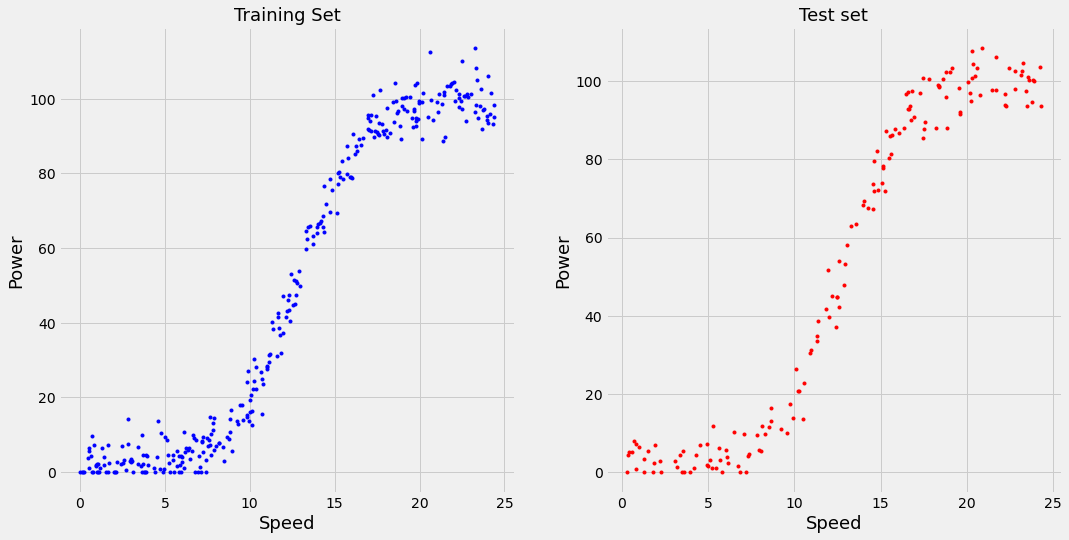

In [25]:
# Set the parameters for the subplots to be created
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot the data set before and after cleaning for comparison purposes
axes[0].plot(x_train, y_train, '.b')
axes[1].plot(x_test, y_test, '.r')

# Add labels 
axes[0].set_xlabel('Speed', fontsize=18)
axes[0].set_ylabel('Power', fontsize=18)
axes[1].set_xlabel('Speed', fontsize=18)
axes[1].set_ylabel('Power', fontsize=18)

# Add titles to subplots
axes[0].set_title('Training Set', fontsize=18)
axes[1].set_title('Test set', fontsize=18)

In [26]:
# Train a model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x_train, y_train, epochs=600, batch_size=10)

Epoch 1/600
33/33 [==============================] - 3s 2ms/step - loss: 4330.6436
Epoch 2/600
33/33 [==============================] - 0s 2ms/step - loss: 4011.3727
Epoch 3/600
33/33 [==============================] - 0s 2ms/step - loss: 3899.4566
Epoch 4/600
33/33 [==============================] - 0s 2ms/step - loss: 3866.3713
Epoch 5/600
33/33 [==============================] - 0s 2ms/step - loss: 3464.4870
Epoch 6/600
33/33 [==============================] - 0s 2ms/step - loss: 3360.8660
Epoch 7/600
33/33 [==============================] - 0s 2ms/step - loss: 3124.3938
Epoch 8/600
33/33 [==============================] - 0s 3ms/step - loss: 3370.0676
Epoch 9/600
33/33 [==============================] - 0s 2ms/step - loss: 3075.7438
Epoch 10/600
33/33 [==============================] - 0s 3ms/step - loss: 2949.3762
Epoch 11/600
33/33 [==============================] - 0s 2ms/step - loss: 2793.6082
Epoch 12/600
33/33 [==============================] - 0s 2ms/step - loss: 3071.3082
E

33/33 [==============================] - 0s 3ms/step - loss: 309.5883
Epoch 100/600
33/33 [==============================] - 0s 2ms/step - loss: 307.5152
Epoch 101/600
33/33 [==============================] - 0s 2ms/step - loss: 286.4024
Epoch 102/600
33/33 [==============================] - 0s 2ms/step - loss: 292.7457
Epoch 103/600
33/33 [==============================] - 0s 2ms/step - loss: 279.9664
Epoch 104/600
33/33 [==============================] - 0s 2ms/step - loss: 280.8630
Epoch 105/600
33/33 [==============================] - 0s 2ms/step - loss: 278.0380
Epoch 106/600
33/33 [==============================] - 0s 1ms/step - loss: 275.3992
Epoch 107/600
33/33 [==============================] - 0s 2ms/step - loss: 275.2992
Epoch 108/600
33/33 [==============================] - 0s 2ms/step - loss: 277.2601
Epoch 109/600
33/33 [==============================] - 0s 2ms/step - loss: 258.9842
Epoch 110/600
33/33 [==============================] - 0s 2ms/step - loss: 243.6297
Epoch 

33/33 [==============================] - 0s 2ms/step - loss: 50.3583
Epoch 198/600
33/33 [==============================] - 0s 2ms/step - loss: 50.0354
Epoch 199/600
33/33 [==============================] - 0s 2ms/step - loss: 47.2644
Epoch 200/600
33/33 [==============================] - 0s 2ms/step - loss: 46.1445: 0s - loss: 45.85
Epoch 201/600
33/33 [==============================] - 0s 2ms/step - loss: 48.1178
Epoch 202/600
33/33 [==============================] - 0s 2ms/step - loss: 45.0426
Epoch 203/600
33/33 [==============================] - 0s 2ms/step - loss: 50.1908
Epoch 204/600
33/33 [==============================] - 0s 2ms/step - loss: 50.1698
Epoch 205/600
33/33 [==============================] - 0s 2ms/step - loss: 48.9657
Epoch 206/600
33/33 [==============================] - 0s 1ms/step - loss: 50.1526
Epoch 207/600
33/33 [==============================] - 0s 2ms/step - loss: 43.9813
Epoch 208/600
33/33 [==============================] - 0s 2ms/step - loss: 43.7931


33/33 [==============================] - 0s 1ms/step - loss: 24.1997
Epoch 296/600
33/33 [==============================] - 0s 1ms/step - loss: 25.4160
Epoch 297/600
33/33 [==============================] - 0s 1ms/step - loss: 25.2319
Epoch 298/600
33/33 [==============================] - 0s 1ms/step - loss: 23.9540
Epoch 299/600
33/33 [==============================] - 0s 1ms/step - loss: 22.6438
Epoch 300/600
33/33 [==============================] - 0s 1ms/step - loss: 24.0082
Epoch 301/600
33/33 [==============================] - 0s 1ms/step - loss: 22.3005
Epoch 302/600
33/33 [==============================] - 0s 1ms/step - loss: 21.7088
Epoch 303/600
33/33 [==============================] - 0s 1ms/step - loss: 22.4455
Epoch 304/600
33/33 [==============================] - 0s 1ms/step - loss: 23.7282
Epoch 305/600
33/33 [==============================] - 0s 1ms/step - loss: 24.4552
Epoch 306/600
33/33 [==============================] - 0s 1ms/step - loss: 25.8966
Epoch 307/600
33/3

33/33 [==============================] - 0s 1ms/step - loss: 17.6391
Epoch 394/600
33/33 [==============================] - 0s 1ms/step - loss: 18.7806
Epoch 395/600
33/33 [==============================] - 0s 1ms/step - loss: 16.5087
Epoch 396/600
33/33 [==============================] - 0s 1ms/step - loss: 19.4207
Epoch 397/600
33/33 [==============================] - ETA: 0s - loss: 20.32 - 0s 2ms/step - loss: 20.2878
Epoch 398/600
33/33 [==============================] - 0s 1ms/step - loss: 17.7619
Epoch 399/600
33/33 [==============================] - 0s 1ms/step - loss: 19.4488
Epoch 400/600
33/33 [==============================] - 0s 1ms/step - loss: 20.1555
Epoch 401/600
33/33 [==============================] - 0s 1ms/step - loss: 19.9507
Epoch 402/600
33/33 [==============================] - 0s 1ms/step - loss: 23.1595
Epoch 403/600
33/33 [==============================] - 0s 1ms/step - loss: 18.2899
Epoch 404/600
33/33 [==============================] - 0s 1ms/step - loss: 18

33/33 [==============================] - 0s 1ms/step - loss: 15.8610
Epoch 492/600
33/33 [==============================] - 0s 1ms/step - loss: 16.7236
Epoch 493/600
33/33 [==============================] - 0s 1ms/step - loss: 16.0552
Epoch 494/600
33/33 [==============================] - 0s 1ms/step - loss: 15.4736
Epoch 495/600
33/33 [==============================] - 0s 1ms/step - loss: 18.0038
Epoch 496/600
33/33 [==============================] - 0s 1ms/step - loss: 17.3049
Epoch 497/600
33/33 [==============================] - 0s 1ms/step - loss: 18.9810
Epoch 498/600
33/33 [==============================] - 0s 1ms/step - loss: 19.6227
Epoch 499/600
33/33 [==============================] - 0s 1ms/step - loss: 18.8003
Epoch 500/600
33/33 [==============================] - 0s 1ms/step - loss: 17.2134
Epoch 501/600
33/33 [==============================] - 0s 1ms/step - loss: 17.1362
Epoch 502/600
33/33 [==============================] - 0s 1ms/step - loss: 17.0810
Epoch 503/600
33/3

33/33 [==============================] - 0s 2ms/step - loss: 16.4077
Epoch 590/600
33/33 [==============================] - 0s 2ms/step - loss: 15.2402
Epoch 591/600
33/33 [==============================] - 0s 2ms/step - loss: 16.9423
Epoch 592/600
33/33 [==============================] - 0s 2ms/step - loss: 16.9009
Epoch 593/600
33/33 [==============================] - 0s 2ms/step - loss: 15.8290
Epoch 594/600
33/33 [==============================] - 0s 2ms/step - loss: 16.0721
Epoch 595/600
33/33 [==============================] - 0s 2ms/step - loss: 15.9047
Epoch 596/600
33/33 [==============================] - 0s 2ms/step - loss: 16.1124
Epoch 597/600
33/33 [==============================] - 0s 2ms/step - loss: 15.5567
Epoch 598/600
33/33 [==============================] - 0s 2ms/step - loss: 17.0289
Epoch 599/600
33/33 [==============================] - 0s 2ms/step - loss: 17.2004
Epoch 600/600
33/33 [==============================] - 0s 2ms/step - loss: 17.2321


In [29]:
model.predict([10.0])

array([[20.044592]], dtype=float32)

In [31]:
# model.evaluate on the train set
model.evaluate(x_train, y_train)

11/11 [==============================] - 0s 700us/step - loss: 16.7111


16.71108055114746

In [32]:
# model.evaluate on the test set
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 994us/step - loss: 20.5219


20.5218505859375

In [33]:
# Adapted from [5]
predictions = model.predict(x_test)
predictions

array([[  5.608754 ],
       [  4.994952 ],
       [  7.7597733],
       [ 98.38736  ],
       [ 21.977463 ],
       [ 41.052433 ],
       [ 28.866207 ],
       [  9.764526 ],
       [  2.7878242],
       [ 85.351204 ],
       [  3.3246348],
       [ 88.42341  ],
       [ 95.43445  ],
       [  8.694655 ],
       [ 88.03663  ],
       [ 47.761383 ],
       [ 86.817924 ],
       [ 79.08542  ],
       [100.83455  ],
       [ 53.53839  ],
       [ 99.010704 ],
       [  2.733863 ],
       [ 94.08004  ],
       [  3.8465462],
       [ 13.776665 ],
       [ 10.414259 ],
       [  5.181673 ],
       [ 99.9447   ],
       [ 83.443016 ],
       [ 97.128006 ],
       [ 85.949425 ],
       [ 17.761675 ],
       [ 65.020386 ],
       [  2.4873378],
       [ 60.584538 ],
       [ 98.008675 ],
       [100.459885 ],
       [ 71.90163  ],
       [ 29.685778 ],
       [100.943985 ],
       [ 97.22411  ],
       [  2.9954698],
       [ 90.98034  ],
       [  3.314386 ],
       [ 91.19384  ],
       [ 9

Text(0.5, 1.0, 'Actual inputs & Predicted outputs')

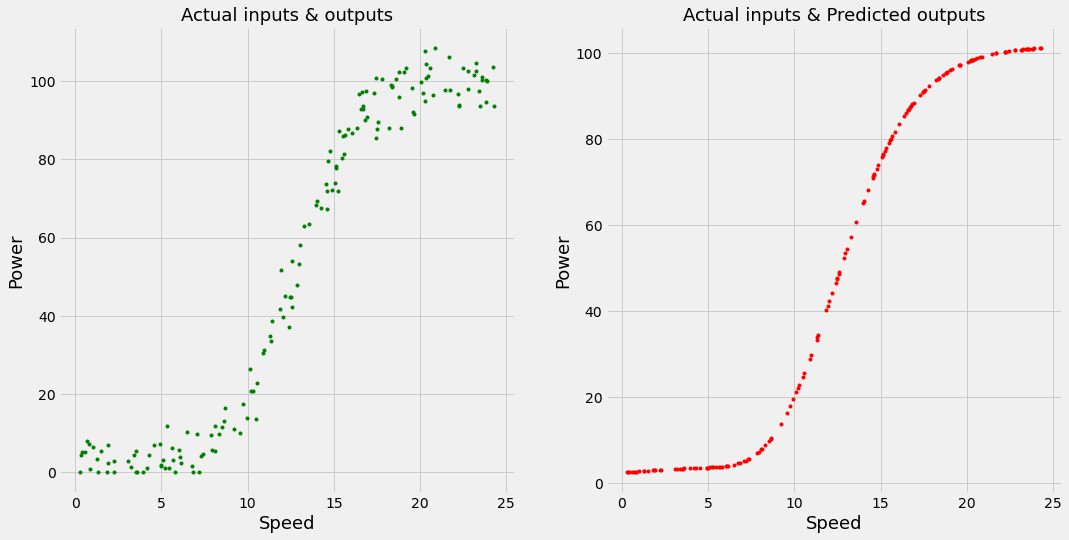

In [35]:
# Set the parameters for the subplots to be created
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot the actual data from the test set and the predicted data 
axes[0].plot(x_test, y_test,  '.g')
axes[1].plot(x_test, predictions, '.r')

# Add labels 
axes[0].set_xlabel('Speed', fontsize=18)
axes[0].set_ylabel('Power', fontsize=18)
axes[1].set_xlabel('Speed', fontsize=18)
axes[1].set_ylabel('Power', fontsize=18)

# Add titles to subplots
axes[0].set_title('Actual inputs & outputs', fontsize=18)
axes[1].set_title('Actual inputs & Predicted outputs', fontsize=18)


In [36]:
model.predict([15.0])

array([[75.20736]], dtype=float32)

In [37]:
predictions.size

161

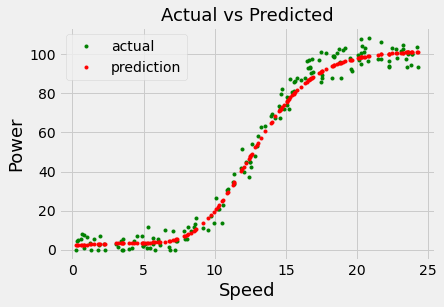

In [38]:
# plot actual power output of test set vs predicted power output for test set
plt.plot(x_test, y_test,  '.g', label='actual')
plt.plot(x_test, predictions, '.r', label='prediction')

# set title
plt.title('Actual vs Predicted', fontsize=18)

plt.xlabel('Speed', fontsize=18)
plt.ylabel('Power', fontsize=18)

# add legend
plt.legend();

In [39]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

-----------------------------------
# Results & Conclusions
-----------------------------------

Using third order polynomial regression fit the plot reasonably well. 

It can be used to make predictions based independent on power or speed values. 

This could be used as a base in real world simulations. 


**Subject-area knowledge**

Any time you are specifying a model, you need to let subject-area knowledge and theory guide you. Some areas might have standard practices and functions for modeling the data. In this case the data is resented as is, however in a real world situation getting as much information about the function of the wind turbines and the effect the weather and wind speed has on them would be vital. 


### Suggested Further Study

Linear regression only scratches the surface in the topic of regression, especially with a real world dataset like this one. 

Other areas of study that can be reccomended are:

* material issues - can the materials produce more power?
* manufacturers specifications - is the turbine limited by design?
* physics - is it possible to have these results? 
* Logistic Regression
* Machine learning - keras

